# BOOTSTRAPPING
- There is an original dataset.
- Create a new dataset that randomly selects values from the original dataset.
- The new dataset will have the same number of values as the original dataset.


Sampling with Replacement: Randomly selecting data and allowing for duplicates.

Bootstrapped Dataset: A dataset that was created using sampling with replacement. It has the same number of values as the original dataset.


Bootstrapping:
1. Make a bootstrapped dataset
2. Calculate somthing (mean, median, std, ... ,)
3. Keep track of that calculation
4. Repeat steps 1-3.


After calculate the mean from 1000 bootstrapped datasets, form a histogram of means. Tells us how the mean might change if we redid the experiement a bunch of times.


Standard Error: Calculate the standard deviation of the bootstrapped means will give you the Standard Error of the mean from the original dataset.

95% Confidence interval: An interval that covers 95% of the bootstrapped means. 
    Ex: The 95% of the confidence covers 0, so the drug is not doing anything.
    

Hypothesis Testing



Bootstrapping results in better confidence intervals. Useful for creating a histogram of what might happen if we repeated the experiment a bunch of times. That histogram will help us calculate confidence intervals and Standard Errors without a formula.

https://www.youtube.com/watch?v=Xz0x-8-cgaQ

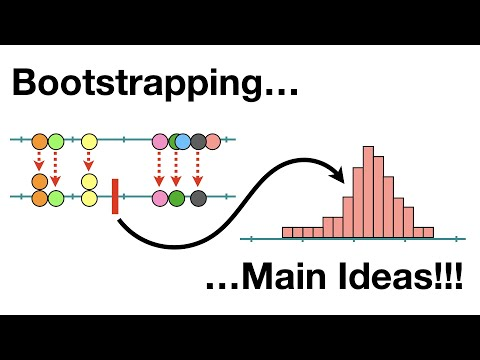

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)


# 1 
Standard Deviation: The variability of individual data points. 

Standard Error (The STD of the sample mean if we took different samples): The variablility of the sample man.

Standard error is always smaller than the orignal standard deviation because it factors in sample size.

A larger sample size more accurately represents the population, so the standard error gets smaller because the sample mean is more accurate. 

Standard error is used when making inferences about the population mean. It is a confidence interval. 

# 2
To calculate the confidence interval, find the 2.5th percentile and the 97.5 percentile of the bootstrapped means. The mean of the population is likely to fall between these two percentiles. The mean +- two standard deviations.


Calculate the Standard Error by finding the std of your bootstrapped sample means. 
The lowerbound = sample.mean() - bootstrapped_sample_means.std() * 1.96 
The upperbound = sample.mean() + bootstrapped_sample_means.std() * 1.96 

Alternatively, 
Find the mean of your sample data: 
Calculate the Standard error of mean: SEM = (SD / sqrt(n)) 
Determine the critical value (t* or z-score): 
Calcualte the Margin of Error: (t*) * (SEM)
Create the Confidence Interval: 
    - Lower_bound: (mean) - (Margin of Error)    
    - upper_bound: (mean) + (Margin of Error)

In [180]:
from scipy import stats
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns


In [134]:
# Population
population_parameter_mu_μ = 0
population_parameter_sigma_σ = 1
normal_distribution = stats.norm(loc=population_parameter_mu_μ, 
                                 scale=population_parameter_sigma_σ) 
# Sample
n = 100 # adjust and experiment with this
# np.random.seed(130)
x = normal_distribution.rvs(size=n) # "x" is the sample of size "n"
# print(x) # uncomment this if you also want to see the sample 

# Mean
print("The sample mean for the current sample is", x.mean()) 
# the sample mean "x-bar" is a (sample) "statistic" (not a "parameter")
# "x-bar" is the "average" of the numbers in a sample

The sample mean for the current sample is 0.13140222849102354


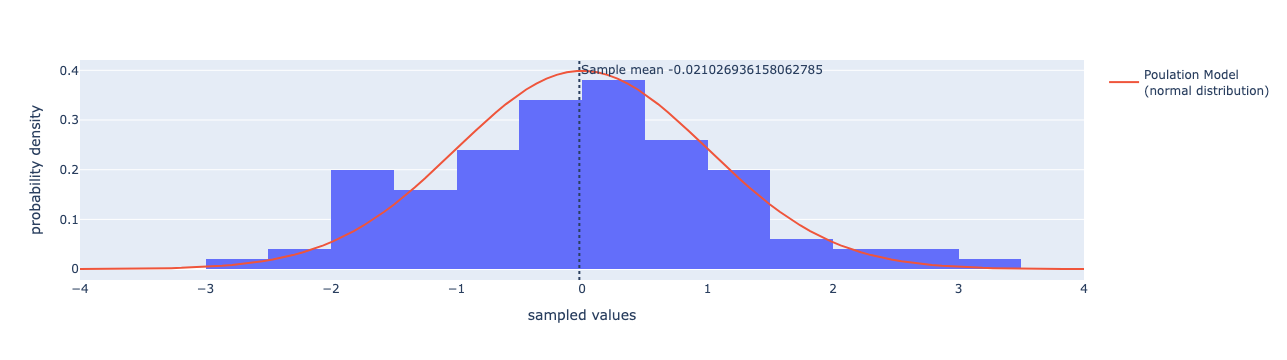

In [144]:
# This code visualizes the population being sampled from (as a red line),
# a sample from this population (as a histogram), and the sample mean

# create another sample
n = 100 # adjust and experiment with this
# np.random.seed(130)
x = normal_distribution.rvs(size=n) # "x" is the sample of size "n"

# create a histogram of the sample and annotate the sample mean
fig = px.histogram(pd.DataFrame({'sampled values': x}), x='sampled values',
                   histnorm='probability density') # so the scale matches the pdf below
fig.add_vline(x=x.mean(), line_dash="dot", annotation_text='Sample mean '+str(x.mean()))

# add population visualization into the figure
support = np.linspace(-4,4,100) 
fig.add_trace(go.Scatter(mode='lines', name='Poulation Model<br>(normal distribution)',
                         y=normal_distribution.pdf(support), x=support))
                                             # pdf means "probability density function"
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS  

In [214]:
# What is this doing?

number_of_simulations = 1000 # adjust and experiment with this
simulated_means = np.zeros(number_of_simulations)
simulated_median = np.zeros(number_of_simulations)
simulated_std = np.zeros(number_of_simulations)
simulated_mode = np.zeros(number_of_simulations)

# np.random.seed(130) # ?
n = 100 # adjust and experiment with this
for i in range(number_of_simulations):
    # np.random.seed(130) # ?
    simulated_data = stats.norm(loc=0, scale=1).rvs(size=n)
    simulated_means[i] = simulated_data.mean()
    simulated_median[i] = np.percentile(simulated_data, 50)
    simulated_std[i] = simulated_data.std()


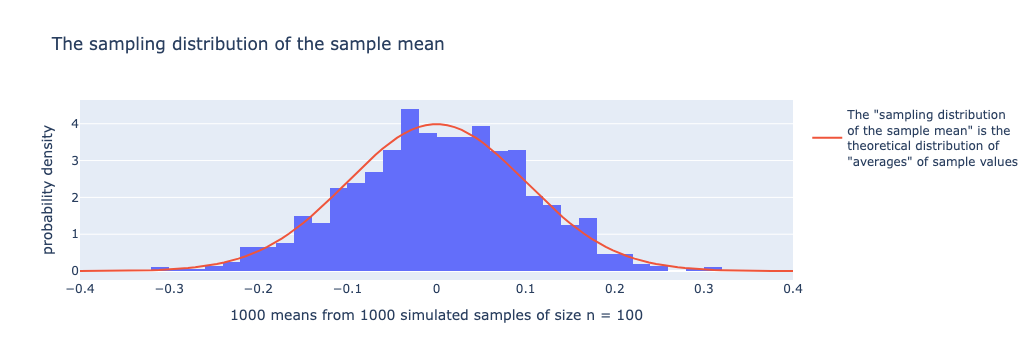

In [148]:
# This time the code creates a histogram of example simulations of sample means
# and visualizes the theoretical distribution of the sample means (as a red line)
    
title1 = "The sampling distribution of the sample mean"
title2 = str(number_of_simulations)+' means from '+str(number_of_simulations)+' simulated samples of size n = '+str(n)
fig = px.histogram(pd.DataFrame({title2: simulated_means}), title=title1, x=title2, 
                   histnorm='probability density')    

# add a visualization of "the sampling distribution of the sample mean" into the figure
support = 4*np.array([-1,1])/np.sqrt(n) # the support code here automatically chooses
support = np.linspace(support[0], support[1], 100) # the plotting range for the x-axis
legend = 'The "sampling distribution<br>of the sample mean" is the<br>theoretical distribution of<br>"averages" of sample values'
fig.add_trace(go.Scatter(mode='lines', name=legend, x=support, 
                         y=stats.norm(0,scale=1/np.sqrt(n)).pdf(support)))
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [196]:
print("Sample mean", x.mean())
print("Mean of means:", simulated_means.mean())
print("Standard Error", simulated_means.std())
print("Confidence Interval", np.percentile(simulated_means, 2.5), 
      np.percentile(simulated_means, 97.5))

lower = x.mean() - simulated_means.std() * 1.96
upper = x.mean() + simulated_means.std() * 1.96
print("Confidence Interval", lower, upper) 


Sample mean -0.021026936158062785
Mean of means: 0.002616830542287869
Standard Error 0.09939974011850103
Confidence Interval -0.1974660388198252 0.19000870086784172
Confidence Interval -0.2158504267903248 0.17379655447419923


# 3
To create a 95% bootstrapped confidence interval using the bootstrapped means, we can take the 2.5th percentile and the 97.5 percentile. We can be 95% confident that the population mean falls between those to intervals.

# 4 


In [233]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [239]:
df['body_mass_lbs'] = df['body_mass_g'] / 453.6

In [251]:
df = df.dropna()

In [253]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
body_mass_lbs        0
dtype: int64

In [299]:
df_adelie_body_mass_lbs = df[df['species'] == 'Adelie']['body_mass_lbs']
sample_median = np.percentile(df_adelie_body_mass_lbs, 50)
sample_mean = df_adelie_body_mass_lbs.mean()
sample_std = df_adelie_body_mass_lbs.std()
print(f"""
Mean {sample_mean}
Median {sample_median}
STD {sample_std}
""")
df_adelie_body_mass_lbs.describe()


Mean 8.170556401150009
Median 8.156966490299823
STD 1.0110673163865156



count    146.000000
mean       8.170556
std        1.011067
min        6.283069
25%        7.412919
50%        8.156966
75%        8.818342
max       10.526896
Name: body_mass_lbs, dtype: float64

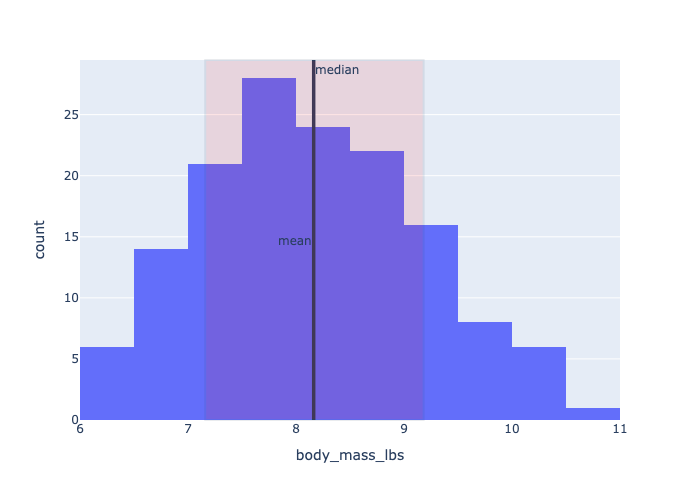

In [297]:
fig = px.histogram(df_adelie_body_mass_lbs, x='body_mass_lbs')
fig.add_vline(sample_mean, annotation_text='mean', annotation_position='left')
fig.add_vline(sample_median, annotation_text='median')
fig.add_vrect(x0=mean-sample_std, x1=mean+sample_std, fillcolor='red', opacity=0.1)
fig.show(renderer='png')

In [395]:
n_iterations = 1000
bootstrap_means = []
# Create an empty list for bootstrap medians and stds 
bootstrap_medians = []
bootstrap_stds = []

np.random.seed(42)


# Bootstrapping process
for _ in range(n_iterations):
    # Sample with replacement
    sample = df_adelie_body_mass_lbs.sample(n=len(df_adelie_body_mass_lbs), replace=True)
    # Calculate statistics
    # Change this to calculate gamma stats like alpha, theta and loc
    bootstrap_means.append(sample.mean())
    bootstrap_medians.append(sample.median())
    bootstrap_stds.append(sample.std())

# Convert lists to NumPy arrays for easier calculations
bootstrap_means = np.array(bootstrap_means)
bootstrap_medians = np.array(bootstrap_medians)
bootstrap_stds = np.array(bootstrap_stds)

# Calculate 95% Confidence Intervals
mean_ci = np.percentile(bootstrap_means, [2.5, 97.5])
median_ci = np.percentile(bootstrap_medians, [2.5, 97.5])
std_ci = np.percentile(bootstrap_stds, [2.5, 97.5])

# Output the results
print("Bootstrap Means :", bootstrap_means.mean())
print("Bootstrap Mean 95% Confidence Interval:", mean_ci)
print("Bootstrap Mean Standard Error:", bootstrap_means.std())
print('\n')
print("Bootstrap Median mean:", bootstrap_medians.mean())
print("Bootstrap Median 95% Confidence Interval:", median_ci)
print("Bootstrap Median Standard Error:", bootstrap_medians.std())
print('\n')
print("Bootstrap Standard Deviation mean:", bootstrap_stds.mean())
print("Bootstrap Standard Deviation Confidence Interval:", std_ci)
print("Bootstrap Standard Deviation Standard Error:", bootstrap_stds.std())

Bootstrap Means : 8.174341191321783
Bootstrap Mean 95% Confidence Interval: [8.01346081 8.33100229]
Bootstrap Mean Standard Error: 0.08121100928747417


Bootstrap Median mean: 8.11656746031746
Bootstrap Median 95% Confidence Interval: [7.82627866 8.37742504]
Bootstrap Median Standard Error: 0.1317425598285228


Bootstrap Standard Deviation mean: 1.0023549893423707
Bootstrap Standard Deviation Confidence Interval: [0.90953378 1.09812944]
Bootstrap Standard Deviation Standard Error: 0.04826171935056167


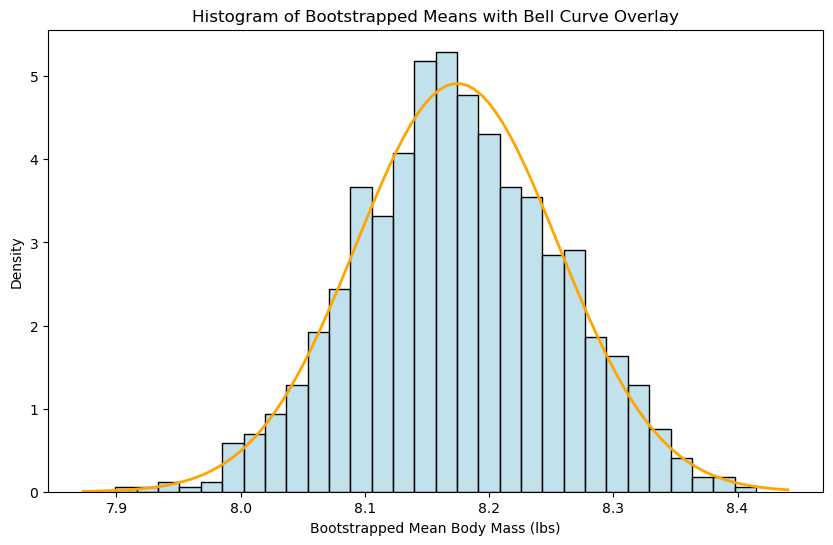

In [397]:
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=30, kde=False, stat='density', color='lightblue', edgecolor='black')

# Fit a normal distribution to the data
mu, std = norm.fit(bootstrap_means)

# Create a range of x values for the bell curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Calculate the bell curve
p = norm.pdf(x, mu, std)

# Overlay the bell curve
plt.plot(x, p, linewidth=2, color='orange')

# Add labels and title
plt.title('Histogram of Bootstrapped Means with Bell Curve Overlay')
plt.xlabel('Bootstrapped Mean Body Mass (lbs)')
plt.ylabel('Density')

# Show the plot
plt.show()

# 5 
The population parameter is a theoretical (unknown) value that we are trying to model using statistics of a sample. The confidence interval tells us that 95% of the confidence intervals sampled contain the true mean.

    An estimate for where the true mean might lie.
   
    We are not sure if the true mean is in the confidence interval or not.

    But, we can say that 95% of the confidence intervals contain the true mean. 

    A larger sample size results in a more narrow confidence interval. 

    Where a smaller sample size results in a more broad interval. 


As we increase the sample size, the sample distribution looks more like the population distribution. 


Population parameter: Represents the mean of the population, it is a fixed value.

Sample statistic: Example, sample mean (x bar) is derived from the population and serves as an estimate of the population mean parameter. The sample mean varies from sample to sample. 

The confidence interval provides a range around the sample statistic to estimate where the true population parameter might lie. 




In [22]:
import pandas as pd
population = pd.DataFrame({'points': [1, 2, 3, 4, 5, 6, 7, 8, 9]})
print('pop mean:', population['points'].mean())

pop mean: 5.0


In [251]:
import numpy as np
import math
np.random.seed(1)

sample = population.sample(n=3)
print('sample mean:', sample.mean())
print('standard error:', sample.std() / math.sqrt(3))

sample mean: points    6.333333
dtype: float64
standard error: points    1.763834
dtype: float64


In [125]:
n = (sample).shape[0]

bootstrap_samples = 1000
mean_bootstrapped = np.zeros(bootstrap_samples)


for i in range(bootstrap_samples):
    simulated_sample = sample.sample(n=n, replace=True)['points']
    mean_bootstrapped[i] = simulated_sample.mean()

np.percentile(mean_bootstrapped, [2.5, 97.5])


array([3., 9.])

In [253]:
import numpy as np
np.random.seed(5)

sample = population.sample(n=7)
print('standard error:', sample.std() / math.sqrt(7))
print('sample mean:', sample.mean())

standard error: points    1.142857
dtype: float64
sample mean: points    4.857143
dtype: float64


In [249]:
n = (sample).shape[0]

bootstrap_samples = 1000
mean_bootstrapped = np.zeros(bootstrap_samples)

np.random.seed(6)
for i in range(bootstrap_samples):
    simulated_sample = sample.sample(n=n, replace=True)['points']
    mean_bootstrapped[i] = simulated_sample.mean()

np.percentile(mean_bootstrapped, [2.5, 97.5])

array([2.85714286, 6.85714286])

We estimate that the true mean of the population lies within our confidence interval.

And if we calculate the confidence interval on many different samples of the population, approximately 95% of those confidence intervals would contain the true mean.



# 6
The process of bootstrapping is taking a sample of a population and then creating 1000 or more simulation samples that are each the same size of the original sample and contain values drawn from the original sample with replacement (independent, the same number can be drawn twice).

The main purpose of bootstrapping it to find a range from a statistic where the parameter is estimated to lie. 

Yes, by calculating the bootstrapped mean and finding the 95% confidence interval from that mean we can estimate that the population mean is within the interval. If the hypothesized mean is within the confidence interval, it may be plausible.

# 7 
The true mean is estimated to fall within the confidence interval. If the confidence interval overlaps 0, then we have valid reason to estimate that the true mean might be 0. The null hypothesis is a hypothesis that the true mean is 0. If 0 is within the confidence interval we fail to reject the fact that the true mean can be estimated at 0. If the confidence interval did not include 0 we can have more or a valid reason to reject the null hypothesis.

# 8 

In [6]:
import pandas as pd

# Create the data as a dictionary
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PatientID           10 non-null     int64 
 1   Age                 10 non-null     int64 
 2   Gender              10 non-null     object
 3   InitialHealthScore  10 non-null     int64 
 4   FinalHealthScore    10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes


In [14]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'InitialHealthScore', 'FinalHealthScore'], dtype='object')

In [22]:
rows, columns = df.shape
print(f'number of rows {rows}, number of columns {columns}')

number of rows 10, number of columns 5


In [10]:
df.describe()

,PatientID,Age,InitialHealthScore,FinalHealthScore
count,10.00000,10.00000,10.000000,10.000000
mean,5.50000,38.40000,81.000000,84.300000
std,3.02765,8.30261,2.828427,2.110819
min,1.00000,26.00000,76.000000,80.000000
25%,3.25000,33.25000,79.250000,83.250000
50%,5.50000,38.00000,81.000000,85.000000
75%,7.75000,44.00000,83.000000,86.000000
max,10.00000,52.00000,85.000000,86.000000


In [12]:
df.isna().sum()

PatientID             0
Age                   0
Gender                0
InitialHealthScore    0
FinalHealthScore      0
dtype: int64

In [24]:
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

In [30]:
df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,HealthScoreChange
0,1,45,M,84,86,2
1,2,34,F,78,86,8
2,3,29,M,83,80,-3
3,4,52,F,81,86,5
4,5,37,M,81,84,3
5,6,41,F,80,86,6
6,7,33,M,79,86,7
7,8,48,F,85,82,-3
8,9,26,M,76,83,7
9,10,39,F,83,84,1


In [56]:
# Group by Gender and generate descriptive statistics
grouped_describe = df.groupby('Gender')['HealthScoreChange']
# Display the grouped descriptive statistics
print(grouped_describe.describe())

        count  mean       std  min  25%  50%  75%  max
Gender                                                
F         5.0   3.4  4.393177 -3.0  1.0  5.0  6.0  8.0
M         5.0   3.2  4.147288 -3.0  2.0  3.0  7.0  7.0


In [133]:
males_data = df[df['Gender'] == 'M']
female_data = df[df['Gender'] == 'F']

In [143]:
from scipy import stats
male_mean, male_std = stats.norm.fit(males_data['HealthScoreChange'])
female_mean, female_std = stats.norm.fit(female_data['HealthScoreChange'])

# Output the fitted parameters
print(f"Male Normal Distribution: Mean = {male_mean}, Std Dev = {male_std}")
print(f"Female Normal Distribution: Mean = {female_mean}, Std Dev = {female_std}")


Male Normal Distribution: Mean = 3.2, Std Dev = 3.7094473981982814
Female Normal Distribution: Mean = 3.4, Std Dev = 3.9293765408777004


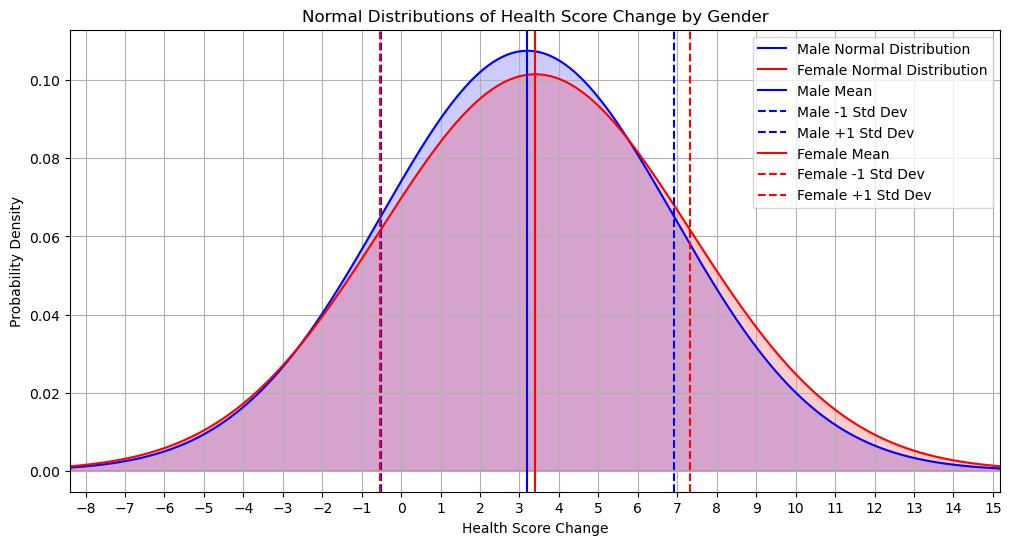

In [172]:
# Calculate the limits for x-axis based on the mean and standard deviation
x_min = min(male_mean - 3 * male_std, female_mean - 3 * female_std)
x_max = max(male_mean + 3 * male_std, female_mean + 3 * female_std)

# Create a range of x values with smaller intervals
x_male = np.linspace(x_min, x_max, 500)  # Increased number of points
x_female = np.linspace(x_min, x_max, 500)  # Increased number of points

# Calculate the normal distribution y values
y_male = stats.norm.pdf(x_male, male_mean, male_std)
y_female = stats.norm.pdf(x_female, female_mean, female_std)

# Plotting
plt.figure(figsize=(12, 6))

# Plot male normal distribution
plt.plot(x_male, y_male, label='Male Normal Distribution', color='blue')
plt.fill_between(x_male, y_male, alpha=0.2, color='blue')

# Plot female normal distribution
plt.plot(x_female, y_female, label='Female Normal Distribution', color='red')
plt.fill_between(x_female, y_female, alpha=0.2, color='red')

# Plot mean and first/second standard deviation lines for males
plt.axvline(male_mean, color='blue', linestyle='-', label='Male Mean')
plt.axvline(male_mean - male_std, color='blue', linestyle='--', label='Male -1 Std Dev')
plt.axvline(male_mean + male_std, color='blue', linestyle='--', label='Male +1 Std Dev')
# plt.axvline(male_mean - 2 * male_std, color='blue', linestyle=':', label='Male -2 Std Dev')
# plt.axvline(male_mean + 2 * male_std, color='blue', linestyle=':', label='Male +2 Std Dev')

# Plot mean and first/second standard deviation lines for females
plt.axvline(female_mean, color='red', linestyle='-', label='Female Mean')
plt.axvline(female_mean - female_std, color='red', linestyle='--', label='Female -1 Std Dev')
plt.axvline(female_mean + female_std, color='red', linestyle='--', label='Female +1 Std Dev')
# plt.axvline(female_mean - 2 * female_std, color='red', linestyle=':', label='Female -2 Std Dev')
# plt.axvline(female_mean + 2 * female_std, color='red', linestyle=':', label='Female +2 Std Dev')

# Add labels and legend
plt.title('Normal Distributions of Health Score Change by Gender')
plt.xlabel('Health Score Change')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()

# Set x-axis limits to include the second standard deviation lines
plt.xlim(x_min, x_max)

# Adjust x-ticks for better clarity
plt.xticks(np.arange(int(x_min), int(x_max) + 1, 1))  # Change interval as needed

plt.show()


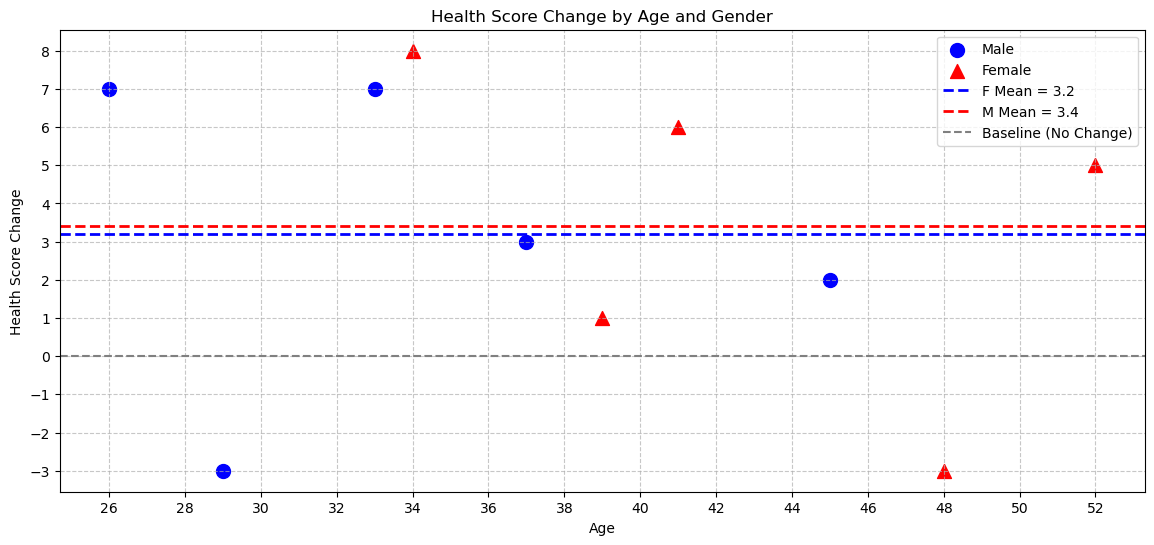

In [98]:
import matplotlib.pyplot as plt

males_data_mean = males_data['HealthScoreChange'].mean()
female_data_mean = female_data['HealthScoreChange'].mean()

# Create a scatter plot with Age on x-axis and HealthScoreChange on y-axis
plt.figure(figsize=(14, 6))

# Plot for Male patients
plt.scatter(df[df['Gender'] == 'M']['Age'],
            df[df['Gender'] == 'M']['HealthScoreChange'],
            color='blue', marker='o', s=100, label='Male')

# Plot for Female patients
plt.scatter(df[df['Gender'] == 'F']['Age'],
            df[df['Gender'] == 'F']['HealthScoreChange'],
            color='red', marker='^', s=100, label='Female')

plt.axhline(y=males_data_mean, color='blue', linestyle='--', linewidth=2, label=f'F Mean = {males_data_mean:.1f}')
plt.axhline(y=female_data_mean, color='red', linestyle='--', linewidth=2, label=f'M Mean = {female_data_mean:.1f}')


# Customize labels and title
plt.xlabel('Age')
plt.ylabel('Health Score Change')
plt.title('Health Score Change by Age and Gender')
plt.axhline(y=0, color='gray', linestyle='--', label='Baseline (No Change)')

# Set custom ticks for age (x-axis) with intervals of 2 years
plt.xticks(range(min(df['Age']), max(df['Age']) + 2, 2))

# Set custom ticks for Health Score Change (y-axis) with intervals of 1 point
plt.yticks(range(min(df['HealthScoreChange']), max(df['HealthScoreChange']) + 1, 1))

# Add a legend
plt.legend()

# Show gridlines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Display plot
plt.show()

We can see from this graph the majority of people, whether they were female, or male felt better after taking the medicine.
Also, notice the age gap between the people who felt worse, it might suggest that age had nothing to do with the medicine making them feel worse 

In [100]:
import numpy as np

sample_size = df.shape[0]
number_of_simulations = 1000

female_mean_bootstrapped = np.zeros(number_of_simulations)
male_mean_bootstrapped = np.zeros(number_of_simulations)


np.random.seed(130)
for i in range(number_of_simulations):
    female_simulated_sample = female_data.sample(n=sample_size, replace=True).HealthScoreChange
    male_simulated_sample = males_data.sample(n=sample_size, replace=True).HealthScoreChange
    female_mean_bootstrapped[i] = female_simulated_sample.mean()
    male_mean_bootstrapped[i] = male_simulated_sample.mean()


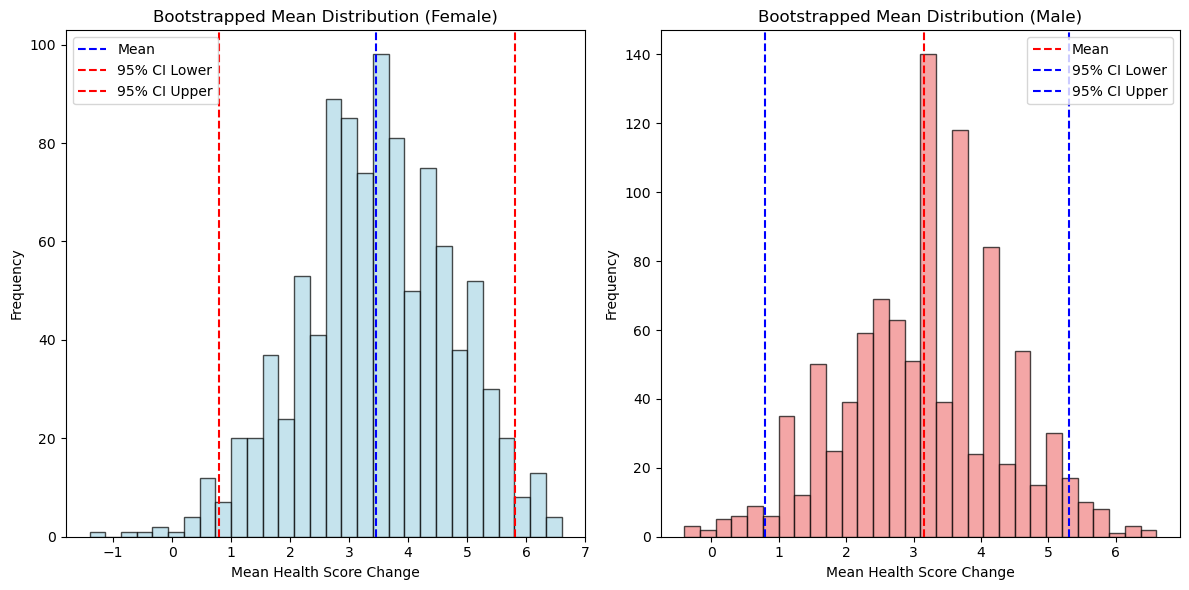

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot for female bootstrapped means
plt.subplot(1, 2, 1)
plt.hist(female_mean_bootstrapped, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(female_mean_estimate, color='blue', linestyle='--', label='Mean')
plt.axvline(female_ci[0], color='red', linestyle='--', label='95% CI Lower')
plt.axvline(female_ci[1], color='red', linestyle='--', label='95% CI Upper')
plt.title('Bootstrapped Mean Distribution (Female)')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.legend()

# Plot for male bootstrapped means
plt.subplot(1, 2, 2)
plt.hist(male_mean_bootstrapped, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(male_mean_estimate, color='red', linestyle='--', label='Mean')
plt.axvline(male_ci[0], color='blue', linestyle='--', label='95% CI Lower')
plt.axvline(male_ci[1], color='blue', linestyle='--', label='95% CI Upper')
plt.title('Bootstrapped Mean Distribution (Male)')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [111]:
# Calculate mean of bootstrapped means
female_mean_estimate = female_mean_bootstrapped.mean()
male_mean_estimate = male_mean_bootstrapped.mean()

# Calculate confidence intervals (95% CI)
female_ci = np.percentile(female_mean_bootstrapped, [2.5, 97.5])
male_ci = np.percentile(male_mean_bootstrapped, [2.5, 97.5])

print(f"Bootstrapped Mean (Female): {female_mean_estimate:.2f}, 95% CI: {female_ci}")
print(f"Bootstrapped Mean (Male): {male_mean_estimate:.2f}, 95% CI: {male_ci}")


Bootstrapped Mean (Female): 3.45, 95% CI: [0.8    5.8025]
Bootstrapped Mean (Male): 3.16, 95% CI: [0.7975 5.3025]


We can estimate that the population mean is within the confidence interval for both males and females. Also we can reject the null hypothesis of 'no effect' because we are 95% confidence that the mean lays within the confidence interval that does not include 0. 

CONSIDER BOOTSTRAPPING THE SAMPLE DISTRIBUTION (NORMAL DISTRIBUTION) TO COMPARE THE CONFIDENCE INTERVAL OF THE MEANS.

Saying there is a 95% chance the parameter is within the confidence interval is wrong because it implies that the parameter changes and 95% of the time its within the confidence interval.

The parameter is constant and doesnt change. So we can say that we are 95% confident that the parameter lies within the confidence interval.

# Chatbot Summaries 

## 1, 2, 3, 4

https://chatgpt.com/share/66f89053-4798-8011-8fa1-4af3ab86699f


Summary of Interactions on Week 4 Statistics Homework
Bootstrapping Explanation:
Bootstrapping is a resampling technique used to estimate the distribution of a sample statistic by drawing multiple samples with replacement from the original dataset.
Steps include drawing resamples, computing the statistic for each, building the bootstrap distribution, and estimating the uncertainty using the standard deviation of the bootstrap sample means (Bootstrap SEM).
Comparison Between Standard Error of Mean (SEM) and Standard Deviation:
The Standard Deviation measures the spread of individual data points around the mean.
The Standard Error of the Mean measures the variability of the sample mean as an estimate of the population mean and decreases as sample size increases ...
​	
SEM is always smaller than the standard deviation and is used to construct confidence intervals.
Using SEM to Calculate a 95% Confidence Interval:
For normally distributed data, the formula is: ...

For small sample sizes, use a critical value from the t-distribution. For large samples, use the z-score (1.96 for 95%).
Example calculation provided using sample data to build a confidence interval.
Constructing a 95% Confidence Interval Using Bootstrapping:
No formulas needed. Steps involve drawing 1,000+ bootstrap samples, calculating the mean for each, sorting these means, and finding the 2.5th and 97.5th percentiles of the bootstrap means to form the confidence interval.
This provides an empirical CI without relying on SEM or t-scores.
Summary Format:
Key topics covered: Bootstrapping, Standard Error vs. Standard Deviation, and Confidence Interval Construction.
The interactions were focused on explaining concepts in a concise manner, along with step-by-step guidance and intuitive comparisons.

## 8 

https://chatgpt.com/share/66fc4c56-5a04-8011-b472-78de14cd5d3e

DataFrame Creation: You started by asking how to create a DataFrame using a CSV format of patient data and how to calculate the difference between final and initial health scores. We discussed naming the new column and how to use df.describe() grouped by gender.
Data Visualization: You expressed interest in visualizing the health score changes using overlapping histograms and later shifted to plotting individual scores on a number line. You then wanted to enhance the visualizations by adjusting the number of intervals for clarity and adding a vertical line for the mean.
Bootstrapping: We talked about how you had implemented bootstrapping to compare the mean health score changes between genders. You wrote code for bootstrapping samples and calculating means and were interested in visualizing the original data alongside bootstrapped means.
Normal Distribution: You wanted to add a normal distribution to your visualizations. We went over fitting normal distributions to your data and plotting them. You also wanted to include first and second standard deviations without duplicating the first.
Bootstrapped Means: Finally, we discussed the concept of comparing bootstrapped means against bootstrapped distributions, including how to visualize and interpret these comparisons effectively.
Throughout our chat, we made adjustments to the visualizations for better clarity and explored various statistical concepts related to your data analysis. If you have any more questions or need further assistance, feel free to ask!

## General inquiries

https://chatgpt.com/share/66fc4cf2-1b50-8000-b742-3f7acbd5784c

In [ ]:
95% of the confidence intervals you calculate will include the true mean.

There is not a 95% chance that the parameter is within the confidence interval.
